In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
import warnings
import joblib
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv('C:/Users/User/Downloads/archive/spam.csv', encoding='latin-1')

In [4]:
df['target'] = df['v1']
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'v1'], axis=1, inplace=True)

df.head()

,v2,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


**Basic Statistics**

In [5]:
print('Dataset Info: ', df.info())

print("\nSummary Statistics:", df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      5572 non-null   object
 1   target  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Dataset Info:  None

Summary Statistics:                             v2 target
count                     5572   5572
unique                    5169      2
top     Sorry, I'll call later    ham
freq                        30   4825

Missing Values:
v2        0
target    0
dtype: int64


In [6]:
print("\nTarget Variable Distribution:")
print(df['target'].value_counts())

print(f"\nClass Distribution (%):")
print(df['target'].value_counts(normalize=True) * 100)


Target Variable Distribution:
target
ham     4825
spam     747
Name: count, dtype: int64

Class Distribution (%):
target
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


**Visualizations**

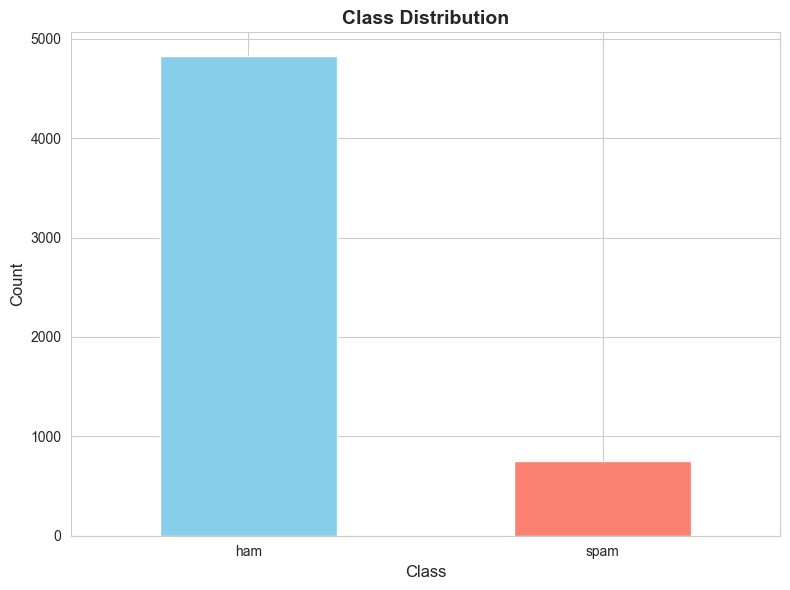

In [ ]:
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Encode Target Variable**

In [8]:
df['target_encoded'] = df['target'].map({'ham' :0, 'spam': 1})

print("Target encoding:")
print(df[['target', 'target_encoded']].head(10))

Target encoding:
  target  target_encoded
0    ham               0
1    ham               0
2   spam               1
3    ham               0
4    ham               0
5   spam               1
6    ham               0
7    ham               0
8   spam               1
9   spam               1


**Split Features and Target**

In [9]:
x = df['v2'].astype(str)
y = df['target_encoded']

print(f"Features shape: {x.shape}")
print(f"Target shape: {y.shape}")
print(f'Class distribution: {y.value_counts().to_dict()}')

Features shape: (5572,)
Target shape: (5572,)
Class distribution: {0: 4825, 1: 747}


**Train-Test Split**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42, stratify=y)

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

print(f"\nTraining class distribution:\n", y_train.value_counts(normalize=True))
print(f"\nTest class distribution:\n", y_test.value_counts(normalize=True))

Training set size: 4457
Test set size: 1115

Training class distribution:
 target_encoded
0    0.865829
1    0.134171
Name: proportion, dtype: float64

Test class distribution:
 target_encoded
0    0.866368
1    0.133632
Name: proportion, dtype: float64


In [11]:
vec = CountVectorizer()
x_train_text = vec.fit_transform(x_train)
x_test_text = vec.transform(x_test)

**Feature Scaling**

In [12]:
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train_text)
x_test_scaled = scaler.transform(x_test_text)

print(f"Scaled training shape: {x_train_scaled.shape}")

Scaled training shape: (4457, 7701)


**Train Multiple Models**

In [17]:
models = {
    'Logistic Regression' : LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'SVM' : SVC(probability=True, random_state=42),
    'Naive Bayes' : MultinomialNB()
}

results = {}

for name, model in models.items():
    print(f"Training {name}")

    if name in ['Logistic Regression', 'SVM']:
        x_train_model = x_train_scaled
        x_test_model = x_test_scaled
    else:
        x_train_model = x_train_text
        x_test_text = x_test_text
    
    model.fit(x_train_model, y_train)
    
    y_pred = model.predict(x_test_model)
    y_pred_proba = model.predict_proba(x_test_model)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model' : model,
        'accuracy' : accuracy,
        'predictions' : y_pred,
        'probabilities' : y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.3f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

Training Logistic Regression
Accuracy: 0.974

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Training Random Forest
Accuracy: 0.968

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Training SVM
Accuracy: 0.940

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       1.00      0.55      0.71       14

**Cross-Validation**

In [20]:
cv_results = {}

for name, model in models.items():
    if name in ['Logistic Regression', 'SVM']:
        x_model = x_train_scaled
    else:
        x_model = x_train_text
        
    scores = cross_val_score(model, x_model, y_train, scoring='f1', cv=5, n_jobs=-1)
    
    cv_results[name] = {
        'mean' : scores.mean(),
        'std' : scores.std()
    }
    print(f"{name:20s}: {scores.mean():.3f} (+/- {scores.std():.3f})")

Logistic Regression : 0.855 (+/- 0.011)
Random Forest       : 0.890 (+/- 0.026)
SVM                 : 0.528 (+/- 0.027)
Naive Bayes         : 0.931 (+/- 0.010)


**Confusion Matrix**


Confusion Matrix for Logistic Regression:


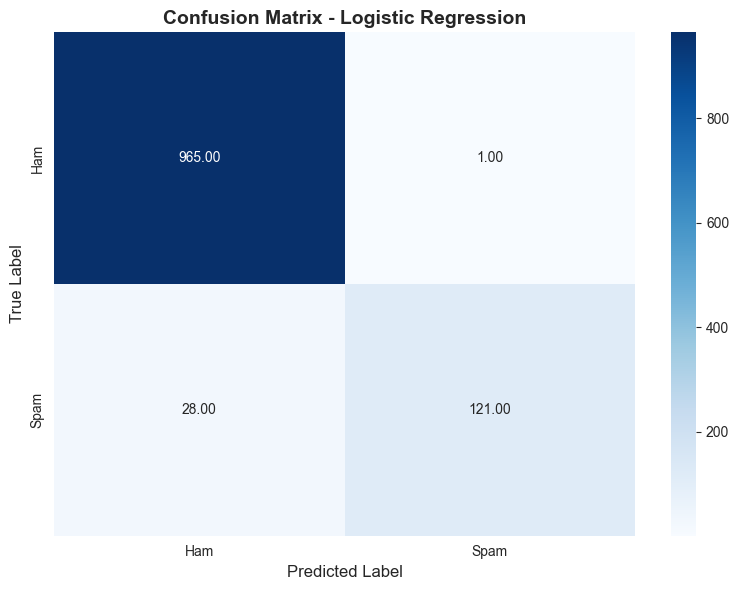

In [28]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['predictions']
print(f"\nConfusion Matrix for {best_model_name}:")

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',         xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

**ROC Curve**

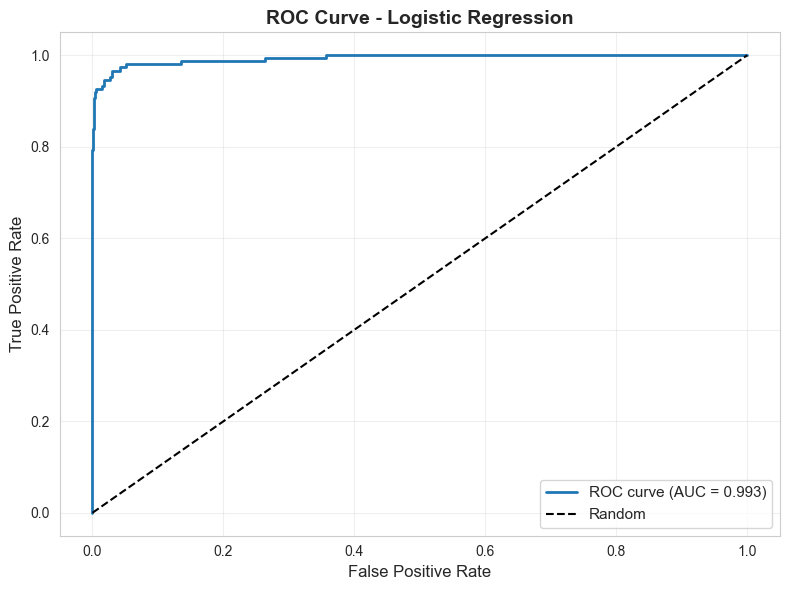

In [29]:
if results[best_model_name]['probabilities'] is not None:
    y_pred_proba = results[best_model_name]['probabilities']
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

**Model Comparison**

In [30]:
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'CV F1 Mean': [cv_results[m]['mean'] for m in results.keys()],
    'CV F1 Std': [cv_results[m]['std'] for m in results.keys()]
}).sort_values('Accuracy', ascending=False)

print(comparison)

                 Model  Accuracy  CV F1 Mean  CV F1 Std
0  Logistic Regression  0.973991    0.854831   0.010627
1        Random Forest  0.967713    0.889937   0.025655
3          Naive Bayes  0.946188    0.931388   0.009817
2                  SVM  0.939910    0.528429   0.026990


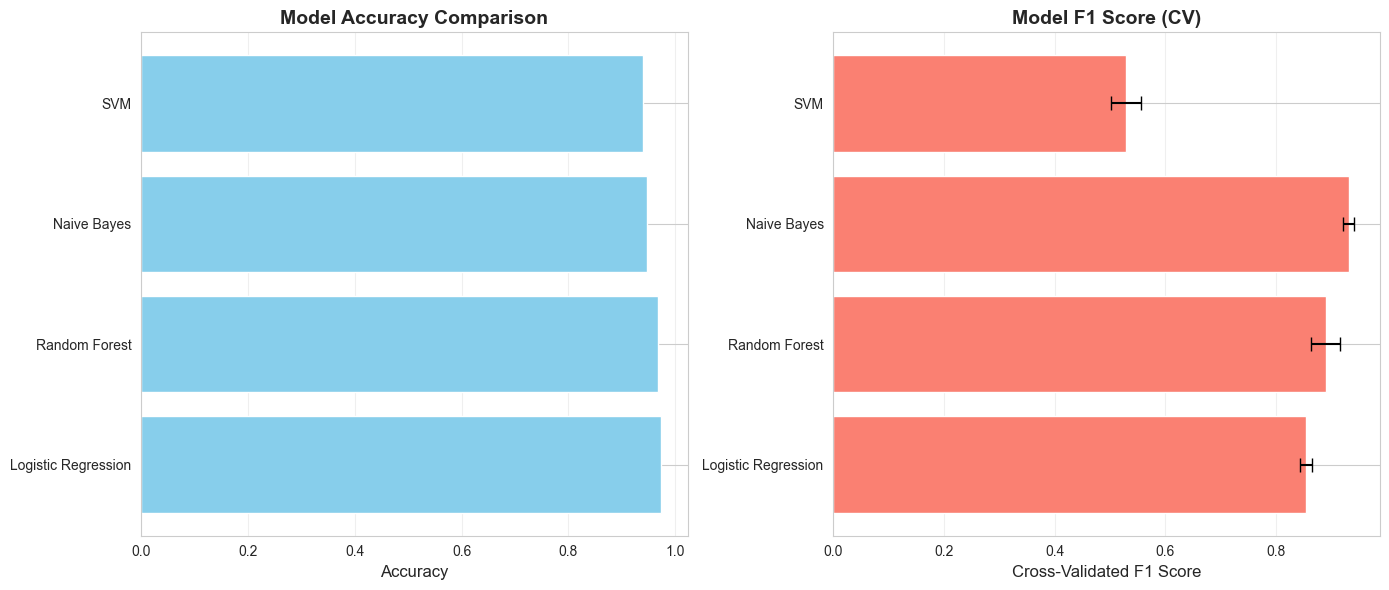

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].barh(comparison['Model'], comparison['Accuracy'], color='skyblue')
axes[0].set_xlabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)


axes[1].barh(comparison['Model'], comparison['CV F1 Mean'], 
             xerr=comparison['CV F1 Std'], color='salmon', capsize=5)
axes[1].set_xlabel('Cross-Validated F1 Score', fontsize=12)
axes[1].set_title('Model F1 Score (CV)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Hyperparameter Tuning**

In [32]:
param_grid = {
    'C' : [0.01, 0.1, 1, 3, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "class_weight": [None, "balanced"],
    "max_iter": [1000, 3000]
}
lrm = LogisticRegression(random_state=42)

grid_search = GridSearchCV(lrm, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.3f}")

Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score: 0.921


In [36]:
best_lrm = grid_search.best_estimator_
y_pred_tuned = best_lrm.predict(x_test_scaled)

print(f"\nTuned model accuracy: {accuracy_score(y_test, y_pred_tuned):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


Tuned model accuracy: 0.981

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**Predictions on New Data**

In [40]:
final_model = best_lrm

In [45]:
new_samples = x_test_scaled[:10] 

predictions = final_model.predict(new_samples)
probabilities = final_model.predict_proba(new_samples)

print("Predictions on New Samples:")
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    class_name = 'Spam' if pred == 1 else 'Ham'
    spam_prob = prob[1]
    print(f"Sample {i+1}: {class_name} (Spam probability: {spam_prob:.3f})")

Predictions on New Samples:
Sample 1: Ham (Spam probability: 0.005)
Sample 2: Ham (Spam probability: 0.048)
Sample 3: Ham (Spam probability: 0.047)
Sample 4: Spam (Spam probability: 0.948)
Sample 5: Ham (Spam probability: 0.029)
Sample 6: Ham (Spam probability: 0.001)
Sample 7: Ham (Spam probability: 0.018)
Sample 8: Ham (Spam probability: 0.062)
Sample 9: Ham (Spam probability: 0.050)
Sample 10: Ham (Spam probability: 0.007)


**Save Model**

In [ ]:
joblib.dump(final_model, 'spam_classifier_model.pkl')
joblib.dump(vec, 'vecotorizer.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']